In [1]:
# papermill parameters
zona = 31
ruta = "/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM"


In [2]:
# Parameters
zona = 55
ruta = "/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM"


### Importa las librerias

In [3]:

import sys
import os

# Añadir la carpeta raíz del proyecto al sys.path
sys.path.append(os.path.abspath(".."))

import importlib
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import src.utilidades as uti
import src.graficos as gra
import src.parametros_sismicos as par

from shapely.geometry import Point

importlib.reload(uti)
importlib.reload(par)
importlib.reload(gra)

<module 'src.graficos' from '/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/graficos.py'>

### Lectura del Dataframe

In [4]:
# Leer el DataFrame guardado

filename = f"datos_zona_{zona}.pkl"
output_file=ruta+"/pkl_files/"+filename

gdf_2002 = pd.read_pickle(output_file)

gdf_2002.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 3574 entries, 20339 to 141401
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Evento        3574 non-null   object        
 1   Latitud       3574 non-null   float64       
 2   Longitud      3574 non-null   float64       
 3   Prof_Km       3574 non-null   float64       
 4   Inten         3574 non-null   object        
 5   Mag           3574 non-null   float64       
 6   Tipo_Mag      3574 non-null   Int64         
 7   Localizacion  3574 non-null   object        
 8   FechaHora     3574 non-null   datetime64[ns]
 9   Mag_mbLgL     3574 non-null   float64       
 10  geometry      3574 non-null   geometry      
 11  Zona_ID       3574 non-null   float64       
dtypes: Int64(1), datetime64[ns](1), float64(6), geometry(1), object(3)
memory usage: 366.5+ KB


## CARACTERÍSTICAS PARAMÉTRICAS

### 1. Parámetros de la ley de Gutenberg–Richter (GR)

In [5]:

# Parámetros a y b para todo el catálogo
# Columna constante en todo el dataframe
gdf_2002_1_global,parametros_GR=uti.gutemberg_richter(gdf_2002, col_mag="Mag_mbLgL", min_mag=None)

print(parametros_GR)

# Evolución de los parámetros a y b (ventanas de 50 eventos)
gdf_2002_1 = par.gutemberg_richter_ventana(gdf_2002, col_mag="Mag_mbLgL", n_eventos=50)

gdf_2002_1.tail(15)

{'a_lsq_global': 4.4128451656784105, 'b_lsq_global': 0.7742151571252676, 'a_mlk_global': 3.5816453887402186, 'b_mlk_global': 0.2849084057059345}


,Evento,Latitud,Longitud,Prof_Km,Inten,Mag,Tipo_Mag,Localizacion,FechaHora,Mag_mbLgL,geometry,Zona_ID,a_lsq,b_lsq,a_mlk,b_mlk
141131,es2025ptdum,37.3776,-1.8052,0.0,,0.8,4,SW PULPÍ.AL,2025-08-12 21:22:59,0.8,POINT (-1.8052 37.3776),55.0,2.531936,0.820861,2.000563,0.502656
141163,es2025pwxjb,37.8364,-1.5033,6.0,,1.3,4,W ALHAMA DE MURCIA.MU,2025-08-14 22:39:46,1.3,POINT (-1.5033 37.8364),55.0,2.496990,0.801530,2.003382,0.507353
141188,es2025pzmvb,36.4970,-2.5741,11.0,,1.5,4,ALBORÁN NORTE,2025-08-16 08:44:21,1.5,POINT (-2.5741 36.497),55.0,2.496453,0.804391,2.004811,0.509735
141195,es2025qagjx,36.2538,-2.7619,13.0,,2.8,4,ALBORÁN NORTE,2025-08-16 18:37:31,2.8,POINT (-2.7619 36.2538),55.0,2.524318,0.815032,2.000563,0.502656
141211,es2025qbwoc,37.4865,-1.9114,3.0,II,2.4,4,NE HUÉRCAL-OVERA.AL,2025-08-17 15:55:57,2.4,POINT (-1.9114 37.4865),55.0,2.478194,0.771877,1.991096,0.486877
141274,es2025qgwcm,37.0644,-2.0233,0.0,,1.4,4,SE SORBAS.AL,2025-08-20 09:21:41,1.4,POINT (-2.0233 37.0644),55.0,2.461700,0.752144,1.984065,0.475158
141293,es2025qilnz,37.8350,-1.4058,0.0,,1.3,4,SE ALHAMA DE MURCIA.MU,2025-08-21 06:17:42,1.3,POINT (-1.4058 37.835),55.0,2.462206,0.754569,1.985949,0.478298
141304,es2025qjpaq,37.8276,-1.4106,0.0,,0.8,4,SE ALHAMA DE MURCIA.MU,2025-08-21 21:11:22,0.8,POINT (-1.4106 37.8276),55.0,2.473183,0.758964,1.984690,0.476200
141307,es2025qjxsp,37.8204,-1.5497,0.0,,0.8,4,NE ALEDO.MU,2025-08-22 01:34:47,0.8,POINT (-1.5497 37.8204),55.0,2.444973,0.744129,1.987219,0.480414
141318,es2025qlgzh,38.0012,-0.5314,4.0,II,2.1,4,MEDITERRÁNEO-LEVANTE SUR,2025-08-22 19:23:18,2.1,POINT (-0.5314 38.0012),55.0,2.429630,0.735639,1.988500,0.482549


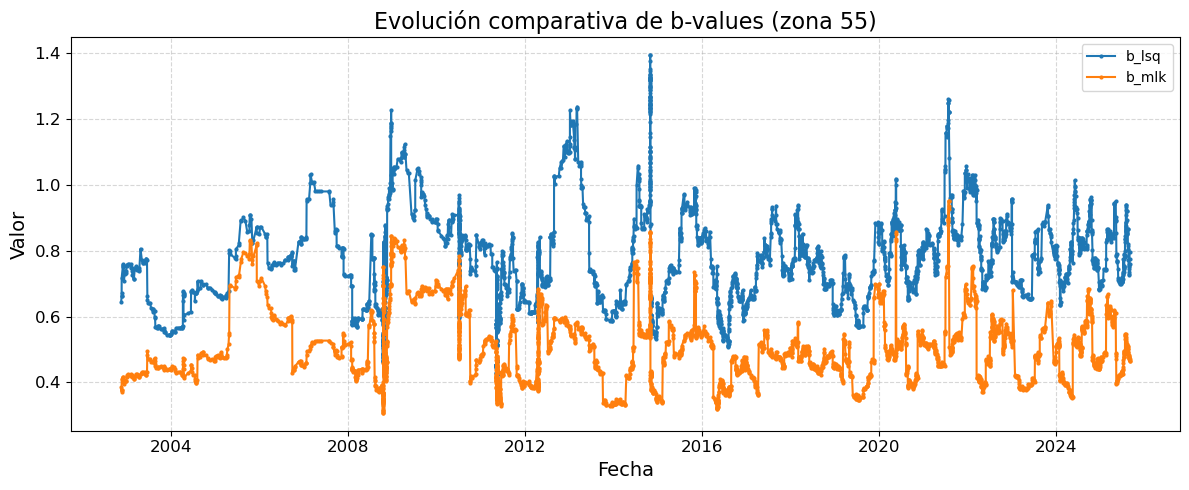

In [6]:
# Comparar evolución de b_lsq y b_mlk

filename = f"Evolución comparativa de b-values (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_1, 
   fecha_col="FechaHora", 
   param_cols=["b_lsq", "b_mlk"], 
   output_file=output_file,
   titulo=filename
   
)

### 2. Tasa media de liberación de energía de Benioff

In [7]:
gdf_2002_2 = par.calcular_tasa_benioff_ventana_rapida(
    gdf_2002_1,
    col_mag="Mag_mbLgL",
    fecha_col="FechaHora",
    T=1.0  # ventana de 1 año
)

gdf_2002_2 .head()

,Evento,Latitud,Longitud,Prof_Km,Inten,Mag,Tipo_Mag,Localizacion,FechaHora,Mag_mbLgL,geometry,Zona_ID,a_lsq,b_lsq,a_mlk,b_mlk,Tasa_Benioff
20339,302060,36.5903,-2.4599,0.0,,1.9,2,ALBORÁN NORTE,2002-01-13 05:45:52,0.497755,POINT (-2.4599 36.5903),55.0,NaN,NaN,NaN,NaN,0.000000
20360,303364,37.1629,-1.9513,22.7,,2.4,2,SW LOS GALLARDOS.AL,2002-01-18 16:26:49,1.121224,POINT (-1.9513 37.1629),55.0,NaN,NaN,NaN,NaN,593.357350
20401,304499,37.6835,-1.6157,0.0,,2.1,2,E LORCA.MU,2002-01-23 19:05:18,0.747143,POINT (-1.6157 37.6835),55.0,NaN,NaN,NaN,NaN,1839.789066
20414,304936,37.7034,-1.6581,0.0,,1.7,2,NE LORCA.MU,2002-01-25 21:54:15,0.248367,POINT (-1.6581 37.7034),55.0,NaN,NaN,NaN,NaN,2053.766469
20425,305490,36.5652,-2.4860,14.8,,1.8,2,ALBORÁN NORTE,2002-01-28 03:39:27,0.373061,POINT (-2.486 36.5652),55.0,NaN,NaN,NaN,NaN,2089.674358


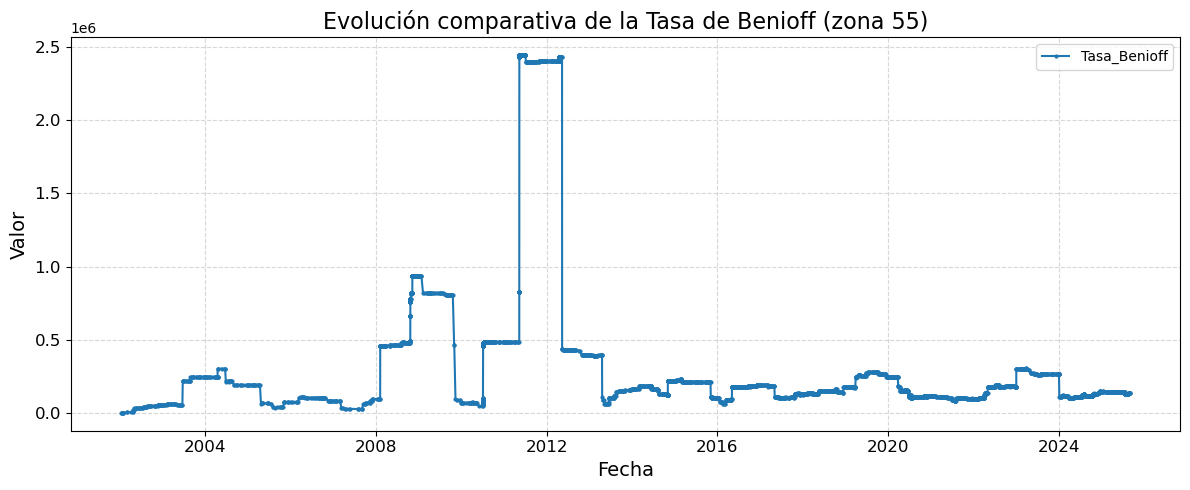

In [8]:
# Comparar evolución de la Tasa de Benioff
filename = f"Evolución comparativa de la Tasa de Benioff (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_2, 
   fecha_col="FechaHora", 
   param_cols=["Tasa_Benioff"], 
   output_file=output_file,
   titulo=filename
   
)

### 3. Tiempo de n eventos

In [9]:
gdf_2002_3 = par.tiempo_desde_evento_n_rapido(
    gdf_2002_2,
    n=50,                  # mirar 50 eventos atrás
    fecha_col="FechaHora",
    unidad="days",
    nueva_col="Tiempo_50_eventos"
)

gdf_2002_3[["FechaHora", "Tiempo_50_eventos"]].tail(15)


,FechaHora,Tiempo_50_eventos
141131,2025-08-12 21:22:59,45.065671
141163,2025-08-14 22:39:46,47.004144
141188,2025-08-16 08:44:21,48.402639
141195,2025-08-16 18:37:31,48.744167
141211,2025-08-17 15:55:57,49.558646
141274,2025-08-20 09:21:41,52.218160
141293,2025-08-21 06:17:42,47.594618
141304,2025-08-21 21:11:22,48.183657
141307,2025-08-22 01:34:47,47.080069
141318,2025-08-22 19:23:18,47.813843


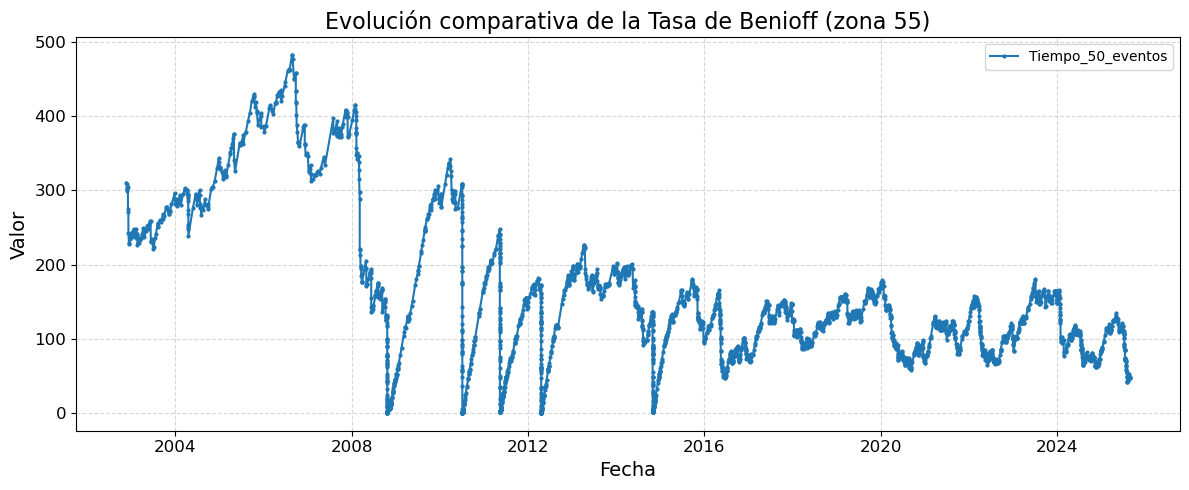

In [10]:
# Comparar evolución de Tiempo_50_eventos

filename = f"Evolución comparativa de la Tasa de Benioff (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_3, 
   fecha_col="FechaHora", 
   param_cols=["Tiempo_50_eventos"], 
   output_file=output_file,
   titulo=filename
       
)

### 4. Magnitud media en n eventos previos

In [11]:
gdf_2002_4 = par.magnitud_media_eventos_previos(
    gdf_2002_3,
    n=50,                     # mirar 50 eventos atrás
    col_mag="Mag_mbLgL",
    nueva_col="Mag_media_50"
)

gdf_2002_4[["FechaHora","Mag_mbLgL", "Mag_media_50"]].tail(15)

,FechaHora,Mag_mbLgL,Mag_media_50
141131,2025-08-12 21:22:59,0.8,1.464
141163,2025-08-14 22:39:46,1.3,1.456
141188,2025-08-16 08:44:21,1.5,1.452
141195,2025-08-16 18:37:31,2.8,1.464
141211,2025-08-17 15:55:57,2.4,1.492
141274,2025-08-20 09:21:41,1.4,1.514
141293,2025-08-21 06:17:42,1.3,1.508
141304,2025-08-21 21:11:22,0.8,1.512
141307,2025-08-22 01:34:47,0.8,1.504
141318,2025-08-22 19:23:18,2.1,1.500


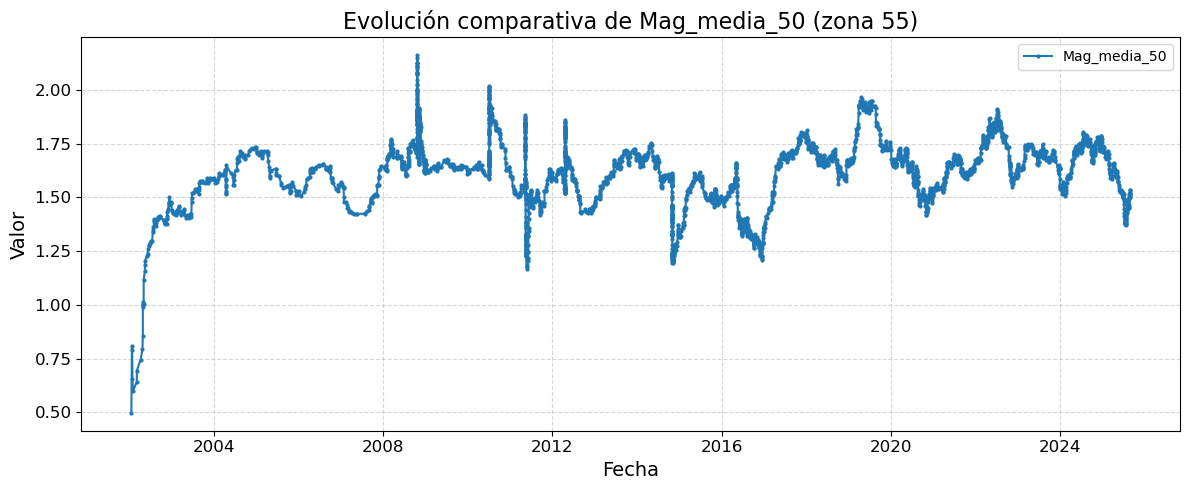

In [12]:
# Comparar evolución de Mag_media_50
filename = f"Evolución comparativa de Mag_media_50 (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_4, 
   fecha_col="FechaHora", 
   param_cols=["Mag_media_50"], 
   output_file=output_file,
   titulo=filename
   
)

### 5. Valor medio y desviación estándar de la magnitud en los últimos 30 días

In [13]:
gdf_2002_5 = par.estadisticas_magnitud_ventana(gdf_2002_4, fecha_col="FechaHora", mag_col="Mag_mbLgL", dias=30)

gdf_2002_5[["FechaHora", "Mag_mbLgL", "Mag_media_30d", "Mag_std_30d"]].tail(15)

,FechaHora,Mag_mbLgL,Mag_media_30d,Mag_std_30d
3559,2025-08-12 21:22:59,0.8,1.537500,0.441223
3560,2025-08-14 22:39:46,1.3,1.516667,0.449585
3561,2025-08-16 08:44:21,1.5,1.541379,0.429715
3562,2025-08-16 18:37:31,2.8,1.583333,0.480720
3563,2025-08-17 15:55:57,2.4,1.609677,0.494877
3564,2025-08-20 09:21:41,1.4,1.600000,0.531507
3565,2025-08-21 06:17:42,1.3,1.588462,0.524082
3566,2025-08-21 21:11:22,0.8,1.559259,0.535838
3567,2025-08-22 01:34:47,0.8,1.532143,0.545047
3568,2025-08-22 19:23:18,2.1,1.557143,0.554730


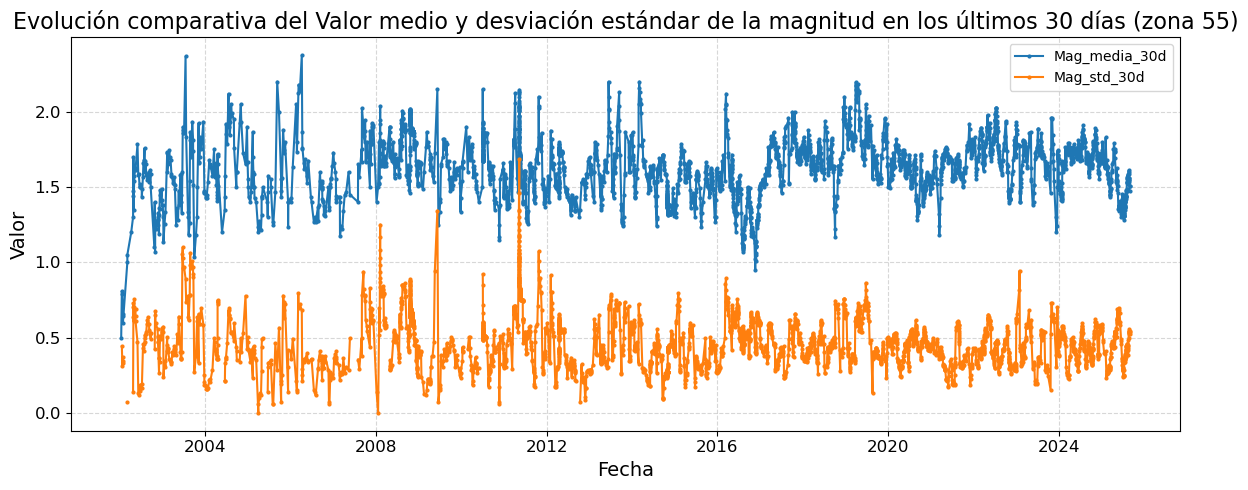

In [14]:
# Comparar evolución de Mag_media_30d y Mag_std_30d
filename = f"Evolución comparativa del Valor medio y desviación estándar de la magnitud en los últimos 30 días (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_5, 
   fecha_col="FechaHora", 
   param_cols=["Mag_media_30d","Mag_std_30d"], 
   output_file=output_file,
   titulo=filename
)

### 6a. Cambios en la tasa sísmica (z-value)

In [15]:
gdf_2002_6a = par.calcular_z_value_vectorizado(
    gdf_2002_5, fecha_col="FechaHora", T=30, col_out="z_30d_eventos"
)

gdf_2002_6a[["FechaHora", "z_30d_eventos"]].tail(20)

,FechaHora,z_30d_eventos
3554,2025-08-05 01:25:50,1.663515
3555,2025-08-05 02:05:58,1.663515
3556,2025-08-08 03:09:38,1.416931
3557,2025-08-09 20:49:05,1.549604
3558,2025-08-11 01:02:03,0.708465
3559,2025-08-12 21:22:59,0.593679
3560,2025-08-14 22:39:46,0.118391
3561,2025-08-16 08:44:21,-0.355517
3562,2025-08-16 18:37:31,-0.355517
3563,2025-08-17 15:55:57,0.000000


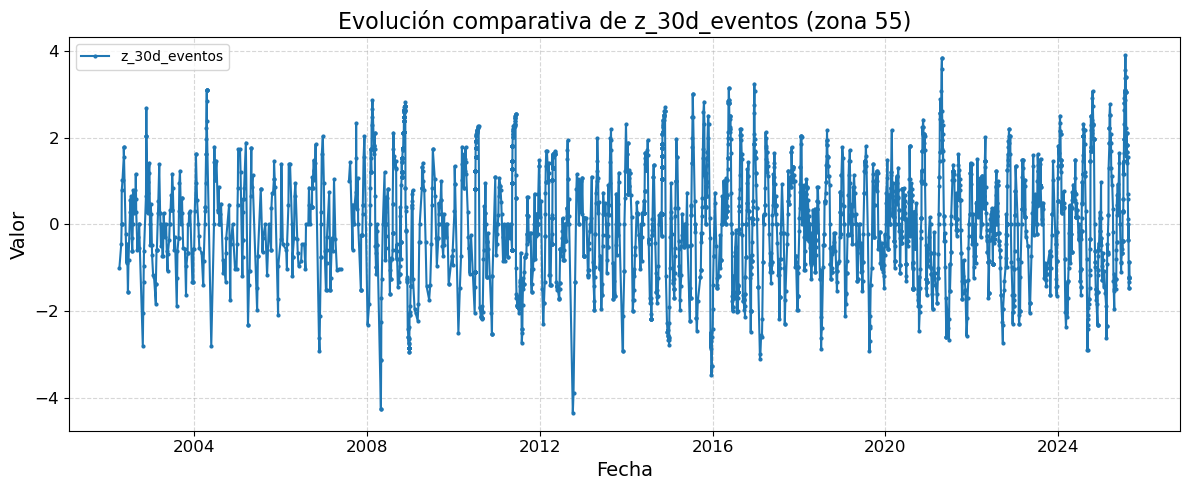

In [16]:
# Comparar evolución de z_30d_eventos
filename = f"Evolución comparativa de z_30d_eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_6a, 
   fecha_col="FechaHora", 
   param_cols=["z_30d_eventos"], 
   output_file=output_file,
   titulo=filename
)

### 6b. Cambios en la tasa sísmica (beta-value)

In [17]:
gdf_2002_6b = par.calcular_beta_value(gdf_2002_6a, fecha_col="FechaHora", ventana_dias=30)

gdf_2002_6b[["FechaHora", "M_obs", "Beta_value"]].tail(15)


,FechaHora,M_obs,Beta_value
3559,2025-08-12 21:22:59,32.0,5.561274
3560,2025-08-14 22:39:46,30.0,4.992973
3561,2025-08-16 08:44:21,30.0,4.992973
3562,2025-08-16 18:37:31,30.0,4.992973
3563,2025-08-17 15:55:57,30.0,4.992973
3564,2025-08-20 09:21:41,25.0,3.572220
3565,2025-08-21 06:17:42,27.0,4.140521
3566,2025-08-21 21:11:22,27.0,4.140521
3567,2025-08-22 01:34:47,28.0,4.424672
3568,2025-08-22 19:23:18,28.0,4.424672


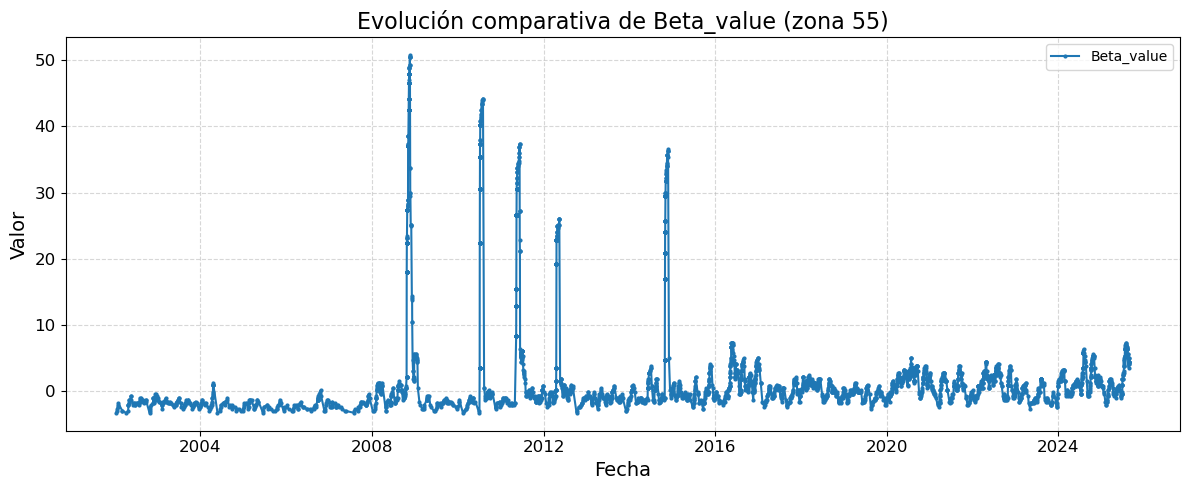

In [18]:
# Comparar evolución de Beta_value
filename = f"Evolución comparativa de Beta_value (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_6b, 
   fecha_col="FechaHora", 
   param_cols=["Beta_value"], 
   output_file=output_file,
   titulo=filename
)

### 7. Magnitud máxima en los T días previos

In [19]:
# Calcular magnitud máxima en ventanas de 30, 90 y 180 días
gdf_2002_7 = par.agregar_magnitud_max_multiventana(
    gdf_2002_6b,
    fecha_col="FechaHora",
    mag_col="Mag_mbLgL",
    ventanas=[30, 90, 180]
)

# Verificar las nuevas columnas
gdf_2002_7[["FechaHora", "MagMax_30d", "MagMax_90d", "MagMax_180d"]].tail()


,FechaHora,MagMax_30d,MagMax_90d,MagMax_180d
3569,2025-08-23 07:07:48,2.8,2.8,2.8
3570,2025-08-23 21:23:49,2.8,2.8,2.8
3571,2025-08-26 04:05:53,2.8,2.8,2.8
3572,2025-08-26 09:32:43,2.8,2.8,2.8
3573,2025-08-26 16:58:59,2.8,2.8,2.8


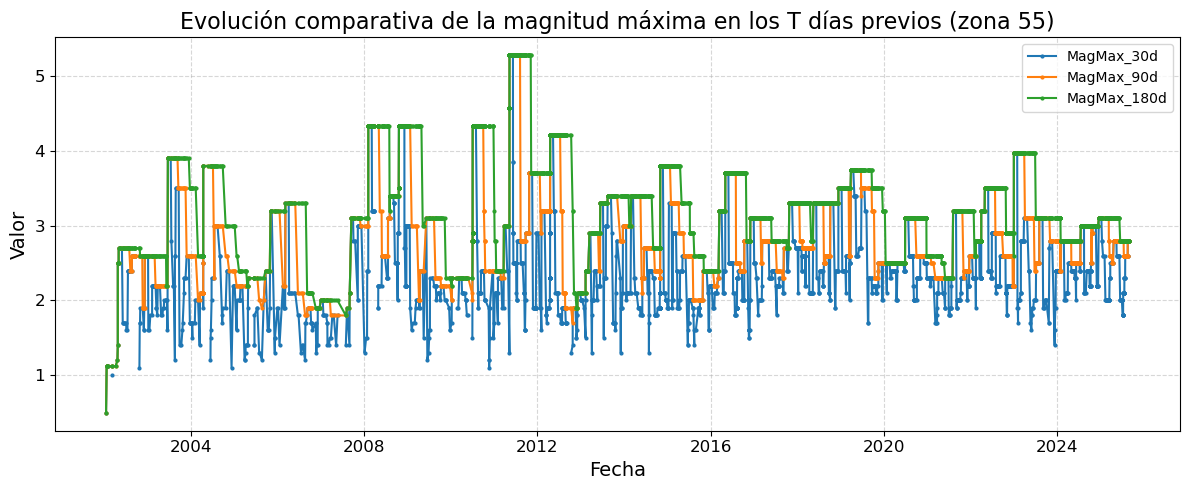

In [20]:
# Comparar evolución de la magnitud máxima en los T días previos

filename = f"Evolución comparativa de la magnitud máxima en los T días previos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_7, 
   fecha_col="FechaHora", 
   param_cols=["MagMax_30d","MagMax_90d","MagMax_180d"], 
   output_file=output_file,
   titulo=filename
)

### 8. Profundidad media en los T días previos

In [21]:
# Calcular profundidad media en los últimos 30 días
gdf_2002_8 = par.agregar_profundidad_media_multiventana(gdf_2002_7, fecha_col="FechaHora", prof_col="Prof_Km", ventanas=[30])

# Verificar
gdf_2002_8[["FechaHora", "ProfMedia_30d"]].tail()


,FechaHora,ProfMedia_30d
3569,2025-08-23 07:07:48,6.357143
3570,2025-08-23 21:23:49,6.310345
3571,2025-08-26 04:05:53,5.960000
3572,2025-08-26 09:32:43,6.038462
3573,2025-08-26 16:58:59,6.111111


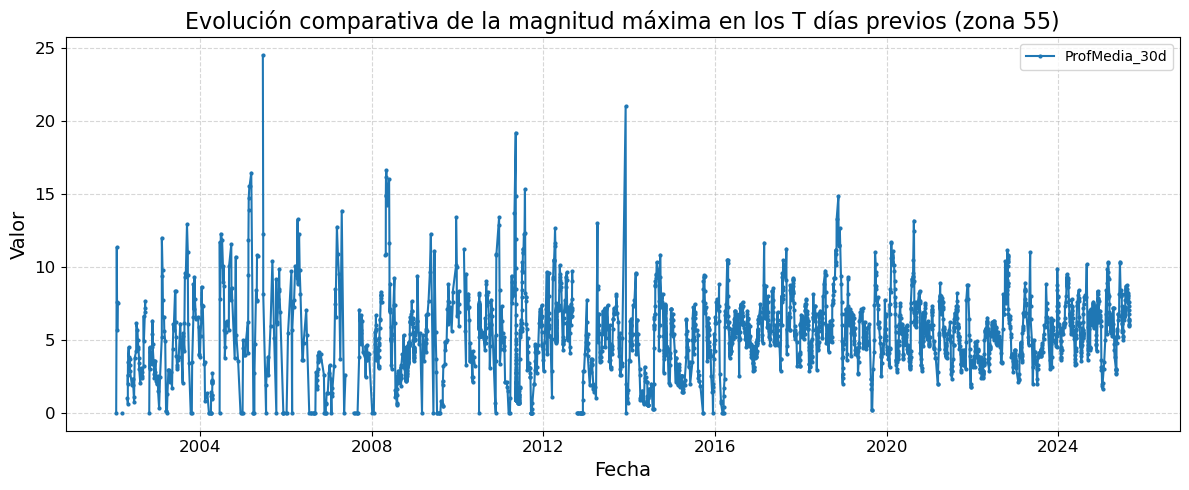

In [22]:
# Comparar evolución de la profundidad media en los T días previos
filename = f"Evolución comparativa de la magnitud máxima en los T días previos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_8, 
   fecha_col="FechaHora", 
   param_cols=["ProfMedia_30d"], 
   output_file=output_file,
   titulo=filename
)

### 9. Tiempo desde el último terremoto

In [23]:
gdf_2002_9 = par.agregar_tiempo_desde_ultimo(gdf_2002_8, fecha_col="FechaHora", unidad="dias")

# Verificar
gdf_2002_9[["FechaHora", "TiempoDesdeUltimo"]].tail(15)


,FechaHora,TiempoDesdeUltimo
3559,2025-08-12 21:22:59,1.847870
3560,2025-08-14 22:39:46,2.053322
3561,2025-08-16 08:44:21,1.419850
3562,2025-08-16 18:37:31,0.411921
3563,2025-08-17 15:55:57,0.887801
3564,2025-08-20 09:21:41,2.726204
3565,2025-08-21 06:17:42,0.872234
3566,2025-08-21 21:11:22,0.620602
3567,2025-08-22 01:34:47,0.182928
3568,2025-08-22 19:23:18,0.742025


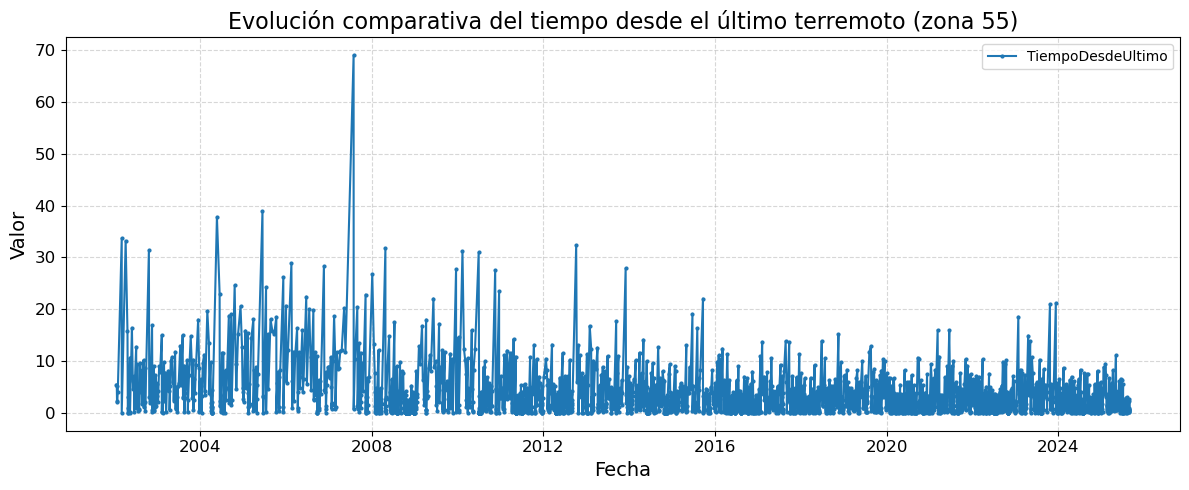

In [24]:
# Comparar evolución del tiempo desde el último terremoto 
filename = f"Evolución comparativa del tiempo desde el último terremoto (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_9, 
   fecha_col="FechaHora", 
   param_cols=["TiempoDesdeUltimo"], 
   output_file=output_file,
   titulo=filename
)

### 10. Tiempo transcurrido entre los últimos n eventos

In [25]:
# Calcular tiempo transcurrido entre el primer y último de los 5 eventos previos
gdf_2002_10 = par.agregar_tiempo_ventana_eventos_vector(gdf_2002_9, fecha_col="FechaHora", n_eventos=5, unidad="dias")

# Verificar
gdf_2002_10[["FechaHora", "TiempoVentana_5Eventos"]].tail(10)

/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:883: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,TiempoVentana_5Eventos
3564,2025-08-20 09:21:41,5.445775
3565,2025-08-21 06:17:42,4.898160
3566,2025-08-21 21:11:22,5.106840
3567,2025-08-22 01:34:47,4.401968
3568,2025-08-22 19:23:18,2.417789
3569,2025-08-23 07:07:48,2.034792
3570,2025-08-23 21:23:49,2.008646
3571,2025-08-26 04:05:53,4.104931
3572,2025-08-26 09:32:43,3.589873
3573,2025-08-26 16:58:59,3.410544


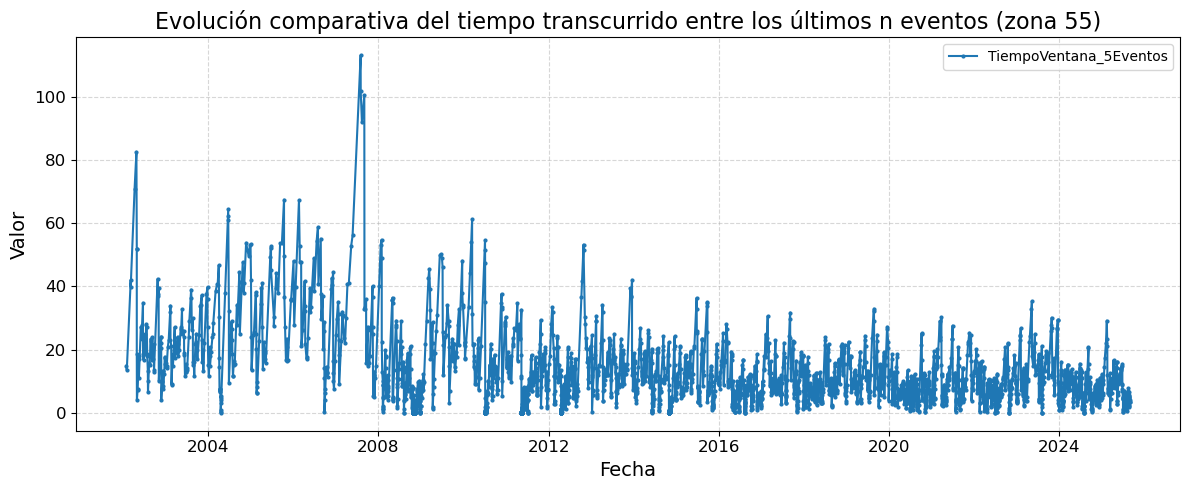

In [26]:
# Comparar evolución del tiempo transcurrido entre los últimos n eventos
filename = f"Evolución comparativa del tiempo transcurrido entre los últimos n eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_10, 
   fecha_col="FechaHora", 
   param_cols=["TiempoVentana_5Eventos"], 
   output_file=output_file,
   titulo=filename
)

### 11. Tiempo medio entre eventos

In [27]:
# Calcular tiempo medio entre eventos de los últimos 5 eventos
gdf_2002_11 = par.agregar_tiempo_medio_ventana_eventos(gdf_2002_10, fecha_col="FechaHora", n_eventos=5, unidad="dias")

# Verificar
gdf_2002_11[["FechaHora", "TiempoMedio_5Eventos"]].tail(10)


/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:947: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,TiempoMedio_5Eventos
3564,2025-08-20 09:21:41,1.361444
3565,2025-08-21 06:17:42,1.224540
3566,2025-08-21 21:11:22,1.276710
3567,2025-08-22 01:34:47,1.100492
3568,2025-08-22 19:23:18,0.604447
3569,2025-08-23 07:07:48,0.508698
3570,2025-08-23 21:23:49,0.502161
3571,2025-08-26 04:05:53,1.026233
3572,2025-08-26 09:32:43,0.897468
3573,2025-08-26 16:58:59,0.852636


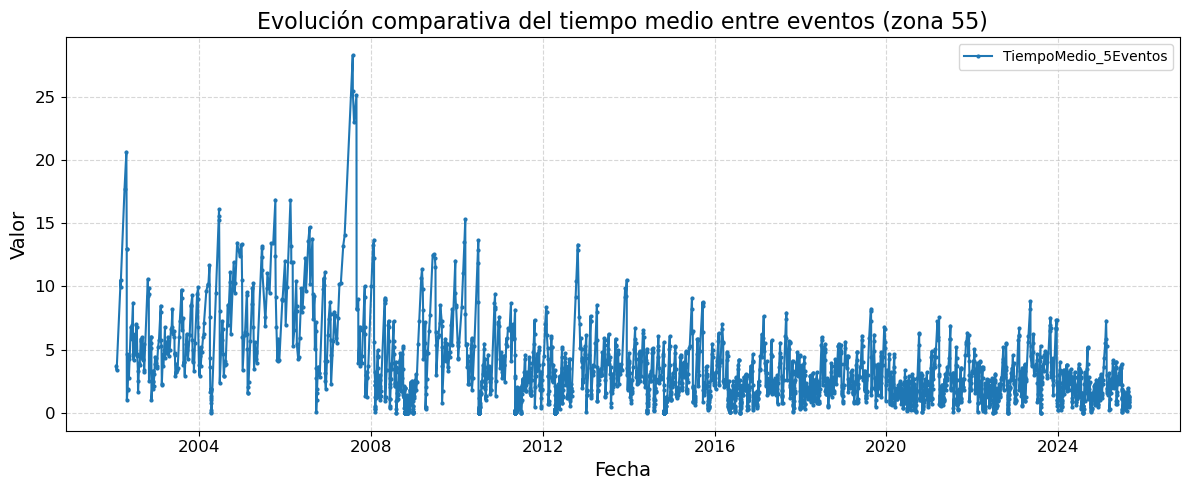

In [28]:
# Comparar evolución del tiempo medio entre eventos
filename = f"Evolución comparativa del tiempo medio entre eventos (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_11, 
   fecha_col="FechaHora", 
   param_cols=["TiempoMedio_5Eventos"], 
   output_file=output_file,
   titulo=filename
)

### 12. Coeficiente de variación

In [29]:
# Calcular coeficiente de variación para ventanas de 5 eventos
gdf_2002_12 = par.agregar_coeficiente_variacion(gdf_2002_11, fecha_col="FechaHora", n_eventos=50)

# Verificar
gdf_2002_12[["FechaHora", "CoefVar_50Eventos"]].tail(10)


/Volumes/Juanjo_4TB/Disco_4T/Master_Inteligencia_Artificial/Curso_2024_25/01_Python_para_Inteligencia_Artificial/Estudio/TFM/src/parametros_sismicos.py:1011: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  ts = df[fecha_col].view("int64") / 1e9  # nanosegundos a segundos


,FechaHora,CoefVar_50Eventos
3564,2025-08-20 09:21:41,0.922629
3565,2025-08-21 06:17:42,0.895797
3566,2025-08-21 21:11:22,0.908689
3567,2025-08-22 01:34:47,0.901548
3568,2025-08-22 19:23:18,0.903900
3569,2025-08-23 07:07:48,0.896364
3570,2025-08-23 21:23:49,0.912044
3571,2025-08-26 04:05:53,0.912249
3572,2025-08-26 09:32:43,0.933372
3573,2025-08-26 16:58:59,0.921307


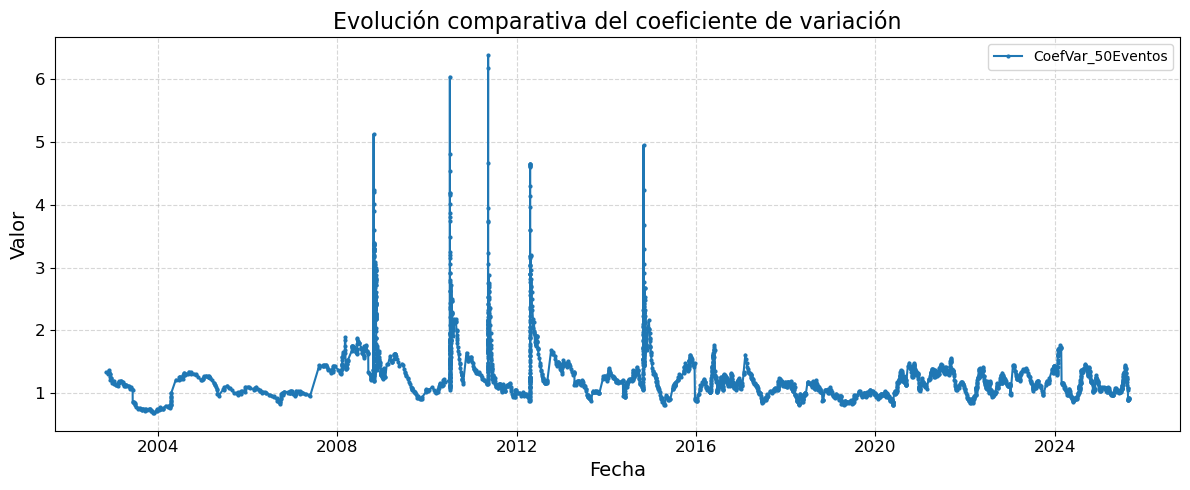

In [30]:
# Comparar evolución del coeficiente de variación
gra.plot_evolucion_multi(
   gdf_2002_12, 
   fecha_col="FechaHora", 
   param_cols=["CoefVar_50Eventos"], 
   titulo="Evolución comparativa del coeficiente de variación",
   
)

### 13. Número de terremotos en los últimos 30 días

In [31]:
# Contar eventos ocurridos en los últimos 30 días
gdf_2002_13 = par.contar_eventos_ultimos_T_dias(gdf_2002_12, fecha_col="FechaHora", T=30)

# Verificar
gdf_2002_13[["FechaHora", "NumEventosUltimos_30dias"]].tail(15)


,FechaHora,NumEventosUltimos_30dias
3559,2025-08-12 21:22:59,32.0
3560,2025-08-14 22:39:46,30.0
3561,2025-08-16 08:44:21,29.0
3562,2025-08-16 18:37:31,30.0
3563,2025-08-17 15:55:57,31.0
3564,2025-08-20 09:21:41,25.0
3565,2025-08-21 06:17:42,26.0
3566,2025-08-21 21:11:22,27.0
3567,2025-08-22 01:34:47,28.0
3568,2025-08-22 19:23:18,28.0


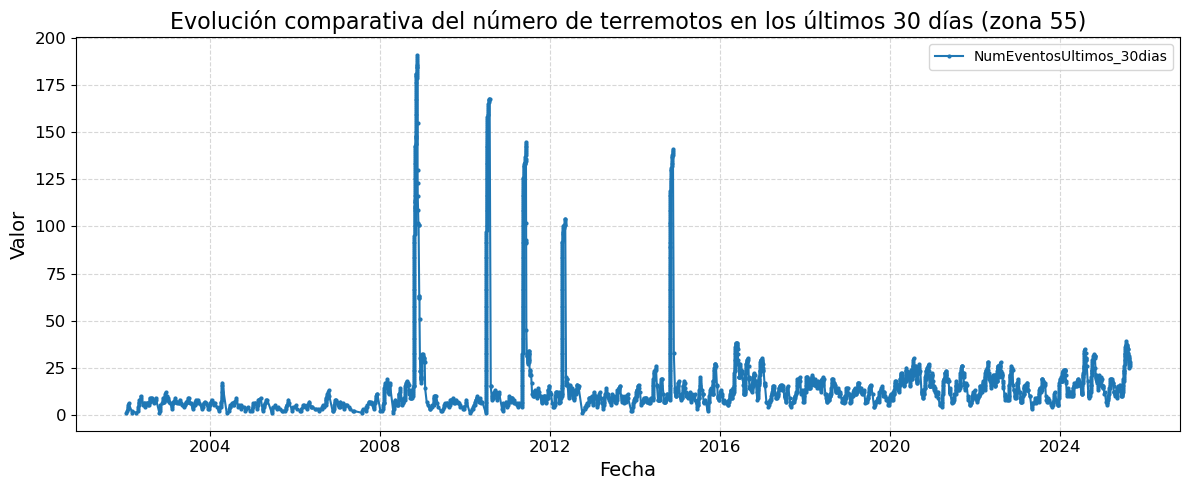

In [32]:
# Comparar evolución del número de terremotos en los últimos 30 días
filename = f"Evolución comparativa del número de terremotos en los últimos 30 días (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_13, 
   fecha_col="FechaHora", 
   param_cols=["NumEventosUltimos_30dias"], 
   output_file=output_file,
   titulo=filename
)

## CARACTERÍSTICAS PARAMÉTRICAS

### 1. Probabilidad de ocurrencia de un terremoto

In [33]:
# Cálculo de la magnitud de completitud
mc_opt = uti.estimar_mc_optimo(gdf_2002_13, col_mag="Mag_mbLgL", bins=0.1, threshold=0.9)

print('Magnitud de completitud: ', mc_opt)

Magnitud de completitud:  1.6


In [34]:

# Cálculo de la probabilidad de ocurrencia de un terremoto para varias magnitudes

gdf_2002_14 = par.agregar_prob_ocurrencia(gdf_2002_13, ["b_lsq", "b_mlk"], M_list=[3.5, 4.0, 4.5], Mmin=mc_opt)

# Verificar
gdf_2002_14[["FechaHora", "b_lsq_prob_M3.5","b_lsq_prob_M4.0","b_lsq_prob_M4.5","b_mlk_prob_M3.5","b_mlk_prob_M4.0","b_mlk_prob_M4.5"]].tail(15)
#gdf_2002_14.tail(15)

,FechaHora,b_lsq_prob_M3.5,b_lsq_prob_M4.0,b_lsq_prob_M4.5,b_mlk_prob_M3.5,b_mlk_prob_M4.0,b_mlk_prob_M4.5
3559,2025-08-12 21:22:59,0.027565,0.010714,0.004164,0.110906,0.062177,0.034858
3560,2025-08-14 22:39:46,0.029998,0.011921,0.004738,0.108650,0.060583,0.033781
3561,2025-08-16 08:44:21,0.029625,0.011734,0.004648,0.107523,0.059791,0.033248
3562,2025-08-16 18:37:31,0.028277,0.011064,0.004329,0.110906,0.062177,0.034858
3563,2025-08-17 15:55:57,0.034153,0.014044,0.005775,0.118832,0.067841,0.038731
3564,2025-08-20 09:21:41,0.037233,0.015662,0.006588,0.125083,0.072380,0.041883
3565,2025-08-21 06:17:42,0.036840,0.015454,0.006483,0.123377,0.071135,0.041014
3566,2025-08-21 21:11:22,0.036138,0.015083,0.006295,0.124514,0.071965,0.041593
3567,2025-08-22 01:34:47,0.038562,0.016372,0.006951,0.122240,0.070308,0.040439
3568,2025-08-22 19:23:18,0.040021,0.017158,0.007356,0.121103,0.069483,0.039866


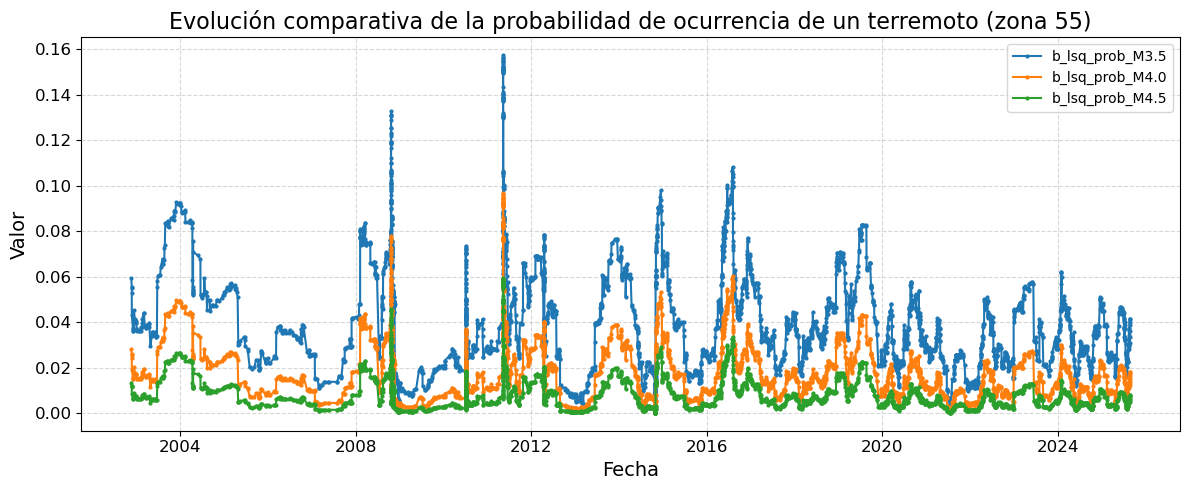

In [35]:
# Comparar evolución de la probabilidad de ocurrencia de un terremoto
filename = f"Evolución comparativa de la probabilidad de ocurrencia de un terremoto (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_14, 
   fecha_col="FechaHora", 
   param_cols=["b_lsq_prob_M3.5","b_lsq_prob_M4.0","b_lsq_prob_M4.5"], 
   output_file=output_file,
   titulo=filename
)

### 2. Desviación de la Ley de Gutenberg-Richer
### a) Utiliza una ventana de T dias previos al evento seleccionado

In [36]:
gdf_2002_15 = par.eta_numba_vector(
    gdf_2002_14,
    fecha_col="FechaHora",
    col_mag="Mag_mbLgL",
    a_lsq="a_lsq",
    b_lsq="b_lsq",
    a_mlk="a_mlk",
    b_mlk="b_mlk",
    dias=30
)

gdf_2002_15[["FechaHora", "eta_T_lsq", "eta_T_mlk"]].tail()

,FechaHora,eta_T_lsq,eta_T_mlk
3569,2025-08-23 07:07:48,0.607263,0.401636
3570,2025-08-23 21:23:49,0.591289,0.393327
3571,2025-08-26 04:05:53,0.665768,0.418138
3572,2025-08-26 09:32:43,0.650976,0.407433
3573,2025-08-26 16:58:59,0.707122,0.418736


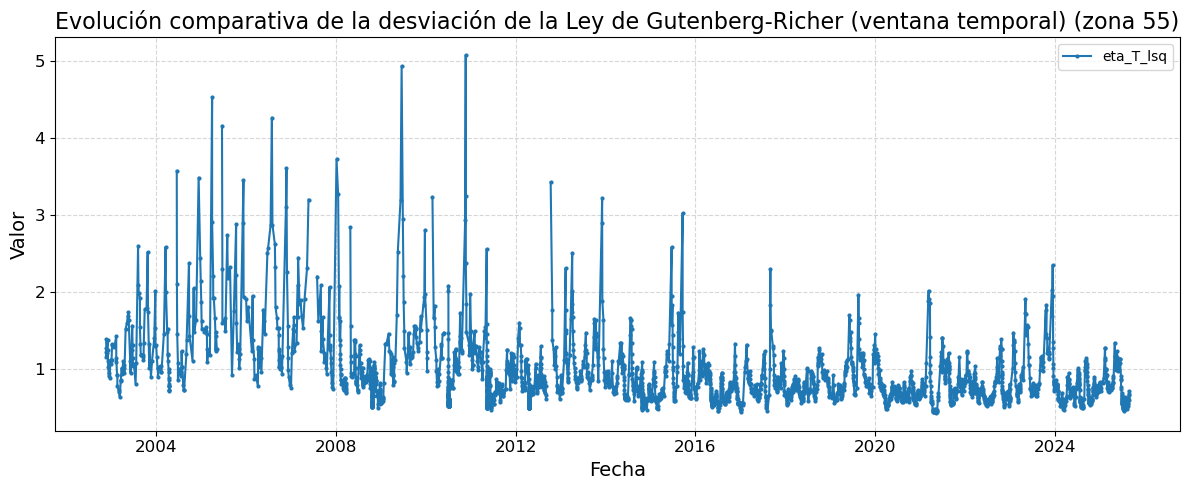

In [37]:
# Comparar evolución de la desviación de la Ley de Gutenberg-Richer (ventana temporal)
  
filename = f"Evolución comparativa de la desviación de la Ley de Gutenberg-Richer (ventana temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_15, 
   fecha_col="FechaHora", 
   param_cols=["eta_T_lsq"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de N eventos previos al evento seleccionado

In [38]:
gdf_2002_16 = par.eta_ventana_eventos(
    gdf_2002_15, 
    col_mag="Mag_mbLgL",
    a_lsq="a_lsq",
    b_lsq="b_lsq",
    a_mlk="a_mlk",
    b_mlk="b_mlk",
    n_eventos=50
)

gdf_2002_16[["FechaHora","eta_N_lsq", "eta_N_mlk"]].tail()

,FechaHora,eta_N_lsq,eta_N_mlk
3569,2025-08-23 07:07:48,6.650594,2.459338
3570,2025-08-23 21:23:49,6.649957,2.462547
3571,2025-08-26 04:05:53,6.677767,2.471912
3572,2025-08-26 09:32:43,6.635420,2.452700
3573,2025-08-26 16:58:59,6.671887,2.459252


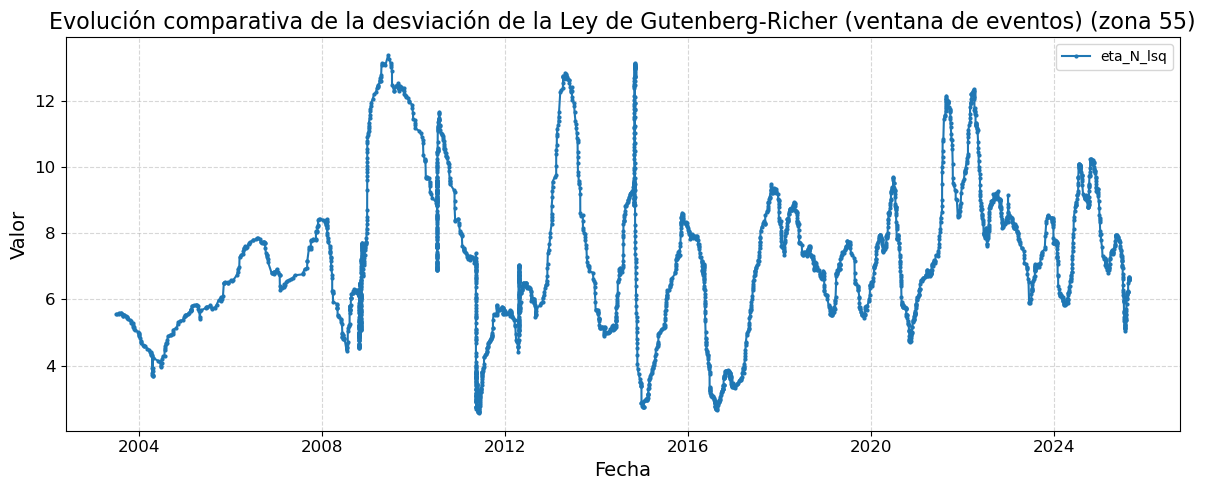

In [39]:
# Comparar evolución de la desviación de la Ley de Gutenberg-Richer (ventana de eventos)

filename = f"Evolución comparativa de la desviación de la Ley de Gutenberg-Richer (ventana de eventos) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_16, 
   fecha_col="FechaHora", 
   param_cols=["eta_N_lsq"], 
   output_file=output_file,
   titulo=filename
)

### 3. Desviación estándar del parámetro b

### a) Utiliza una ventana de T dias previos al evento seleccionado

In [40]:
# Por ventana de días
gdf_2002_17 = par.agregar_sigma_b_tiempo(gdf_2002_16, fecha_col="FechaHora", col_mag="Mag_mbLgL",
                                b_lsq="b_lsq", b_mlk="b_mlk", dias=30)

gdf_2002_17.tail()[["FechaHora", "sigma_b_lsq_30d", "sigma_b_mlk_30d"]]


,FechaHora,sigma_b_lsq_30d,sigma_b_mlk_30d
3569,2025-08-23 07:07:48,0.123466,0.051818
3570,2025-08-23 21:23:49,0.119624,0.050505
3571,2025-08-26 04:05:53,0.139206,0.051859
3572,2025-08-26 09:32:43,0.139737,0.051652
3573,2025-08-26 16:58:59,0.149105,0.050889


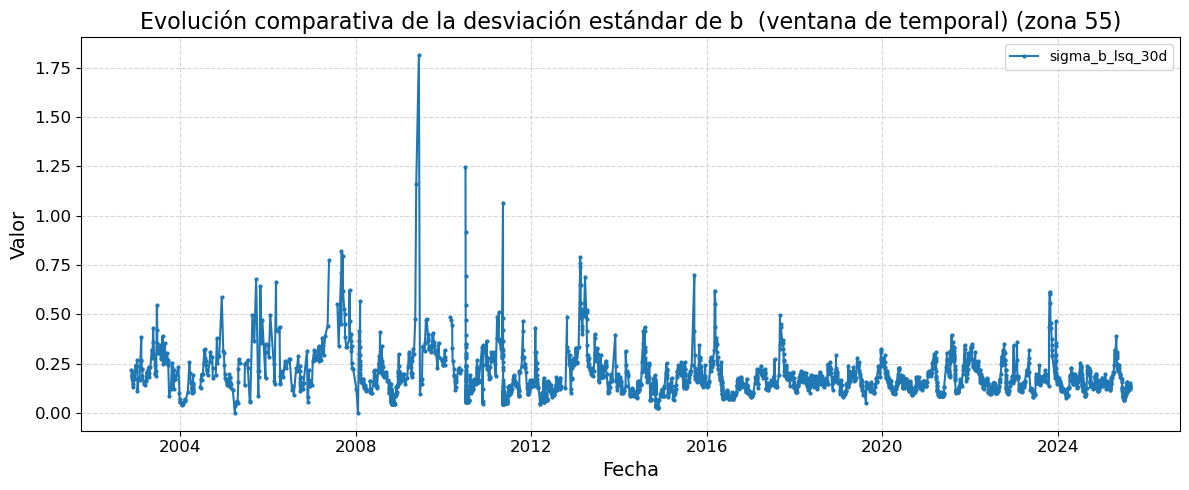

In [41]:
# Comparar evolución de la desviación estándar de b  (ventana de temporal)
filename = f"Evolución comparativa de la desviación estándar de b  (ventana de temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_17,
   fecha_col="FechaHora", 
   param_cols=["sigma_b_lsq_30d"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de N eventos previos al evento seleccionado

In [42]:
# Por número de eventos
gdf_2002_18 = par.agregar_sigma_b_eventos(gdf_2002_17, col_mag="Mag_mbLgL", b_lsq="b_lsq", b_mlk="b_mlk", n_eventos=50)

gdf_2002_18.tail()[["FechaHora", "sigma_b_lsq_50ev", "sigma_b_mlk_50ev"]]
#gdf_2002_18.tail()

,FechaHora,sigma_b_lsq_50ev,sigma_b_mlk_50ev
3569,2025-08-23 07:07:48,0.085498,0.035883
3570,2025-08-23 21:23:49,0.082640,0.034890
3571,2025-08-26 04:05:53,0.088981,0.033148
3572,2025-08-26 09:32:43,0.090566,0.033477
3573,2025-08-26 16:58:59,0.098777,0.033712


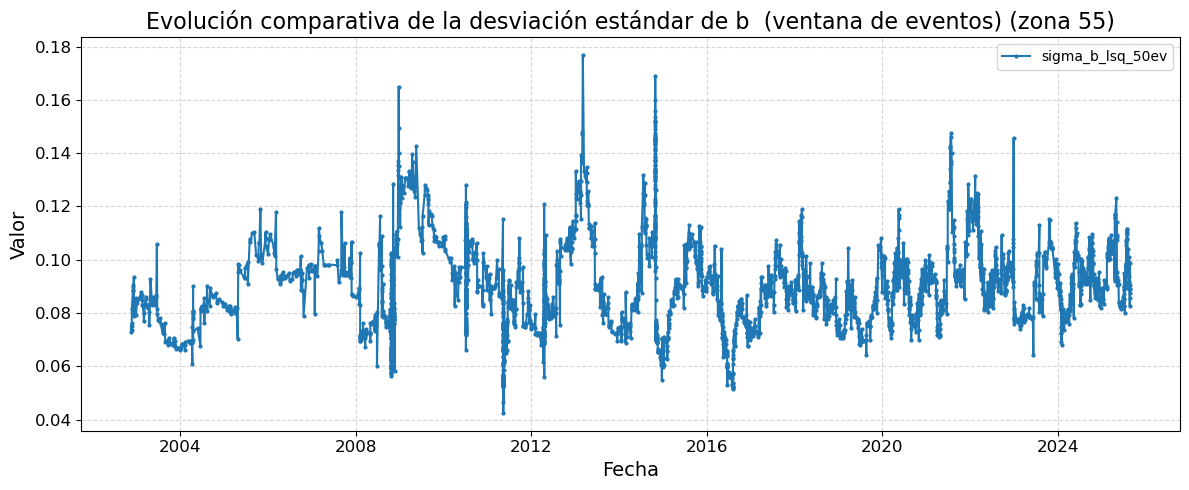

In [43]:
# Comparar evolución de la desviación estándar de b  (ventana de eventos)

filename = f"Evolución comparativa de la desviación estándar de b  (ventana de eventos) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_18, 
   fecha_col="FechaHora", 
   param_cols=["sigma_b_lsq_50ev"], 
   output_file=output_file,
   titulo=filename
)

### 4. Déficit de magnitud

### a) Utiliza el evento actual

In [44]:
gdf_2002_19 = par.agregar_deficit_evento(gdf_2002_18, col_mag="Mag_mbLgL")

gdf_2002_19.tail()[["FechaHora", "Mdef_evento_lsq", "Mdef_evento_mlk"]]


,FechaHora,Mdef_evento_lsq,Mdef_evento_mlk
3569,2025-08-23 07:07:48,-2.047257,-2.906885
3570,2025-08-23 21:23:49,-1.839184,-2.691237
3571,2025-08-26 04:05:53,-1.983418,-2.961654
3572,2025-08-26 09:32:43,-1.731844,-2.699061
3573,2025-08-26 16:58:59,-2.606872,-3.653829


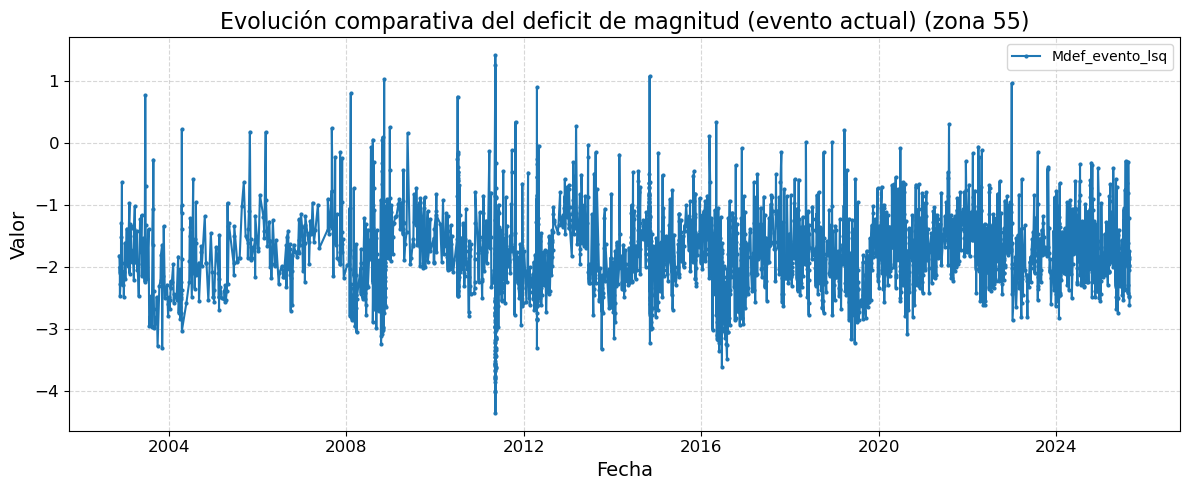

In [45]:
# Comparar evolución del deficit de magnitud (evento actual)

filename = f"Evolución comparativa del deficit de magnitud (evento actual) (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_19, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_evento_lsq"], 
   output_file=output_file,
   titulo=filename
)

### b) Utiliza una ventana de T días previos al evento seleccionado

In [46]:
gdf_2002_20 = par.agregar_deficit_ventana_tiempo(gdf_2002_19, col_mag="Mag_mbLgL", fecha_col="FechaHora", T=180)

gdf_2002_20.tail()[["Mdef_Tdias_lsq","Mdef_Tdias_mlk"]]

,Mdef_Tdias_lsq,Mdef_Tdias_mlk
3569,-0.547257,-1.406885
3570,-0.539184,-1.391237
3571,-0.483418,-1.461654
3572,-0.431844,-1.399061
3573,-0.406872,-1.453829


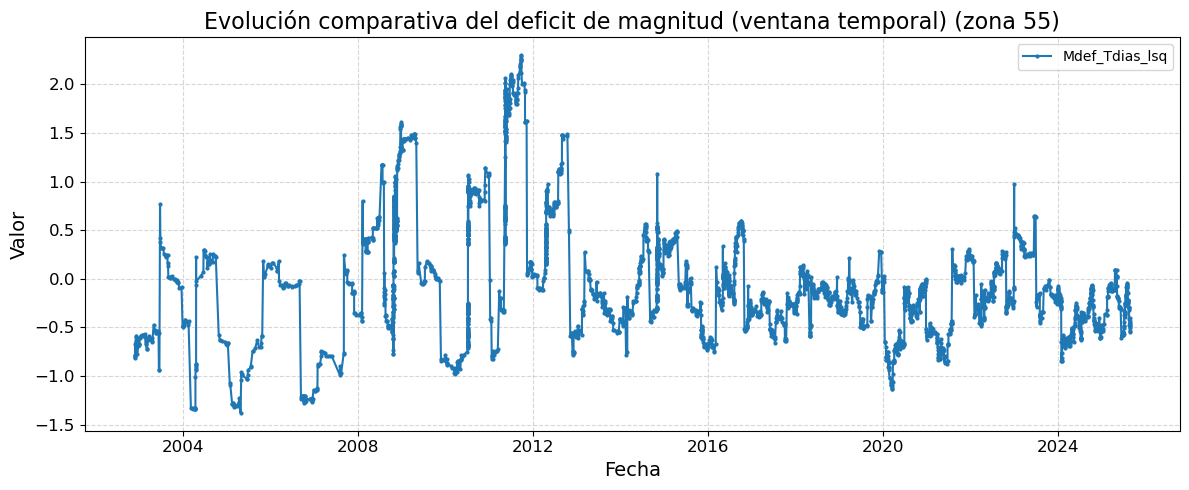

In [47]:
# Comparar evolución del deficit de magnitud (ventana temporal)

filename = f"Evolución comparativa del deficit de magnitud (ventana temporal) (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_20, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_Tdias_lsq"], 
   output_file=output_file,
   titulo=filename
)

### c) Utiliza una ventana de N eventos previos al evento seleccionado

In [48]:
gdf_2002_21 = par.agregar_deficit_ventana_eventos(gdf_2002_20, col_mag="Mag_mbLgL", fecha_col="FechaHora", n_eventos=100)
gdf_2002_21.tail()[["Mdef_Neventos_lsq","Mdef_Neventos_mlk"]]

,Mdef_Neventos_lsq,Mdef_Neventos_mlk
3569,-0.547257,-1.406885
3570,-0.539184,-1.391237
3571,-0.483418,-1.461654
3572,-0.431844,-1.399061
3573,-0.406872,-1.453829


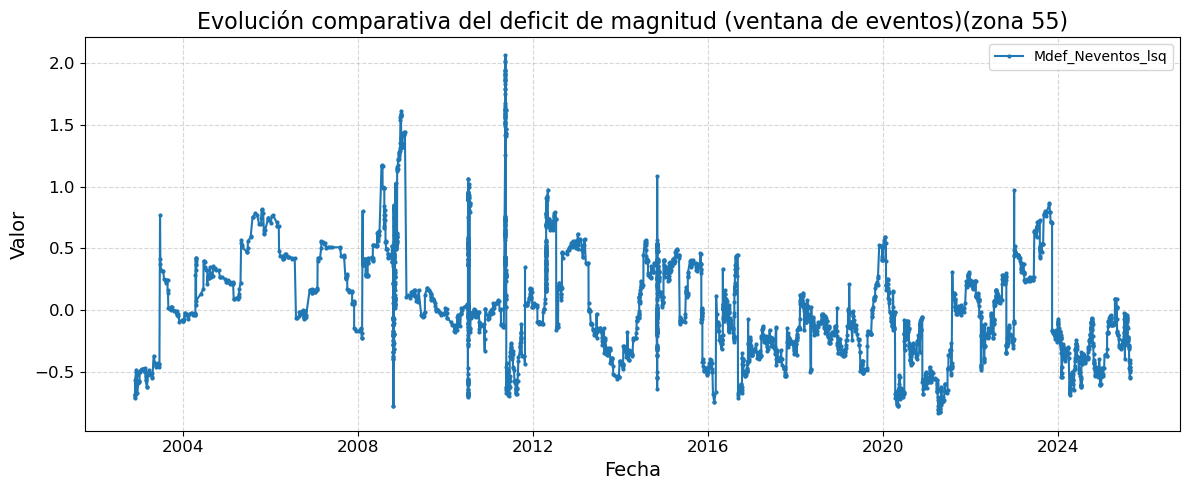

In [49]:
# Comparar evolución del deficit de magnitud (ventana de eventos)

filename = f"Evolución comparativa del deficit de magnitud (ventana de eventos)(zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_21, 
   fecha_col="FechaHora", 
   param_cols=["Mdef_Neventos_lsq"], 
   output_file=output_file,
   titulo=filename
)

### 5. Tiempo de recurrencia total

La magnitud va desde 3.5 a 5.5 en intervalos de 0.1
a y b pueden tomar dos valores diferentes

In [50]:
gdf_2002_22 = par.agregar_tiempo_recurrencia(gdf_2002_21, fecha_col="FechaHora", Mmin=3.5, Mmax=5.5, step=0.1, unidad="años")

# Ver columnas nuevas
print(gdf_2002_22.filter(like="Trec_").tail())

      Trec_M3.5_lsq  Trec_M3.6_lsq  Trec_M3.7_lsq  Trec_M3.8_lsq  \
3569      30.498379      36.056643      42.627889      50.396729   
3570      30.924840      36.569259      43.243900      51.136801   
3571      34.503621      41.104032      48.967078      58.334293   
3572      38.144028      45.611119      54.539972      65.216740   
3573      40.413515      48.542142      58.305731      70.033133   

      Trec_M3.9_lsq  Trec_M4.0_lsq  Trec_M4.1_lsq  Trec_M4.2_lsq  \
3569      59.581425      70.440011      83.277551      98.454705   
3570      60.470319      71.507396      84.558966      99.992716   
3571      69.493422      82.787250      98.624136     117.490559   
3572      77.983597      93.249700     111.504302     133.332433   
3573      84.119341     101.038798     121.361373     145.771556   

      Trec_M4.3_lsq  Trec_M4.4_lsq  ...  Trec_M4.6_mlk  Trec_M4.7_mlk  \
3569     116.397862     137.611122  ...      36.173468      40.317507   
3570     118.243442     139.825302  

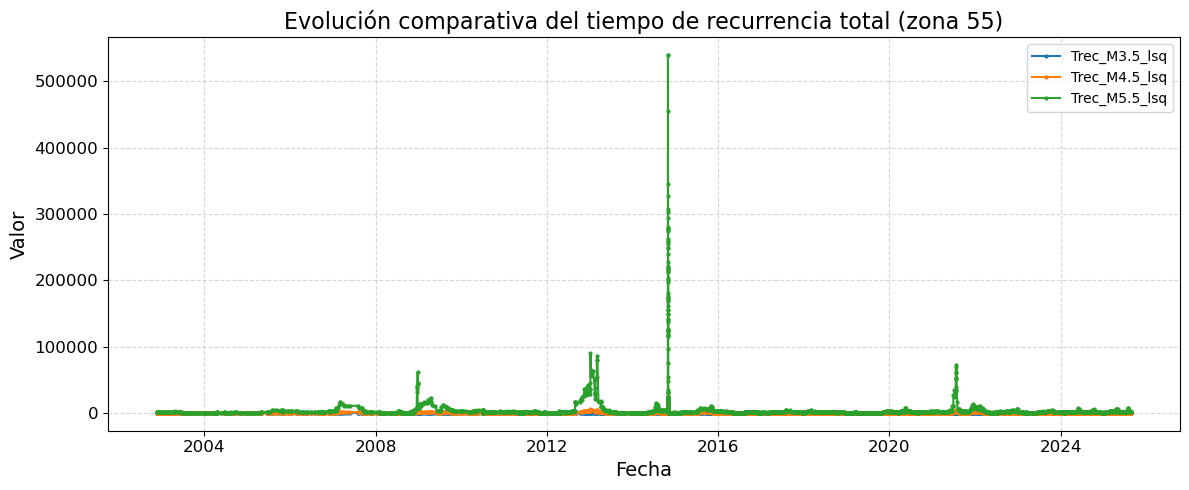

In [51]:
# Compar
filename = f"Evolución comparativa del tiempo de recurrencia total (zona {zona})"
output_file=ruta+"/figuras/"+filename

gra.plot_evolucion_multi(
   gdf_2002_22, 
   fecha_col="FechaHora", 
   param_cols=["Trec_M3.5_lsq","Trec_M4.5_lsq","Trec_M5.5_lsq"], 
   output_file=output_file,
   titulo=filename

)

### 6. Incremento del valor b

In [52]:

gdf_2002_23 = par.agregar_incrementos_b(gdf_2002_22, col_b1="b_lsq", col_b2="b_mlk")

# Ver las nuevas columnas

gdf_2002_23.filter(like="db_").tail()

,db_lsq_0_2,db_lsq_2_4,db_lsq_4_6,db_lsq_6_8,db_lsq_8_10,db_lsq_0_4,db_lsq_4_8,db_lsq_8_12,db_lsq_12_16,db_lsq_16_20,db_mlk_0_2,db_mlk_2_4,db_mlk_4_6,db_mlk_6_8,db_mlk_8_10,db_mlk_0_4,db_mlk_4_8,db_mlk_8_12,db_mlk_12_16,db_mlk_16_20
3569,-0.017044,-0.010440,-0.017308,-0.032514,-0.016470,-0.027484,-0.049822,-0.062737,0.010609,-0.065447,-0.009379,0.002116,-0.008579,-0.022858,0.007080,-0.007263,-0.031437,0.017338,-0.002243,-0.021149
3570,-0.007552,-0.023325,0.006819,-0.062888,0.013502,-0.030877,-0.056068,-0.052046,0.016135,-0.070192,-0.009462,0.006349,0.001042,-0.027498,-0.004698,-0.003112,-0.026456,0.009139,0.003342,-0.024393
3571,0.033112,-0.017044,-0.010440,-0.017308,-0.032514,0.016068,-0.027748,-0.048984,-0.034574,-0.037212,-0.007045,-0.009379,0.002116,-0.008579,-0.022858,-0.016424,-0.006463,-0.015778,0.016868,-0.019206
3572,0.048355,-0.007552,-0.023325,0.006819,-0.062888,0.040803,-0.016505,-0.049385,-0.062136,0.012187,-0.001028,-0.009462,0.006349,0.001042,-0.027498,-0.010490,0.007391,-0.032195,0.017179,-0.006730
3573,0.035726,0.033112,-0.017044,-0.010440,-0.017308,0.068838,-0.027484,-0.049822,-0.062737,0.010609,0.000994,-0.007045,-0.009379,0.002116,-0.008579,-0.006052,-0.007263,-0.031437,0.017338,-0.002243


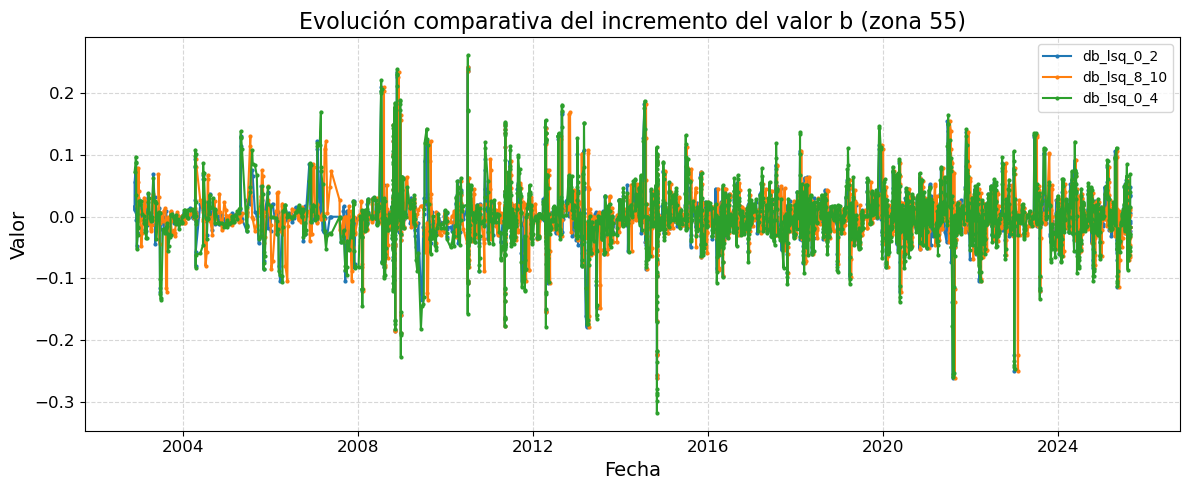

In [53]:
# Comparar evolución del incremento del valor b

filename = f"Evolución comparativa del incremento del valor b (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_23, 
   fecha_col="FechaHora", 
   param_cols=["db_lsq_0_2","db_lsq_8_10","db_lsq_0_4"], 
   output_file=output_file,
   titulo=filename

)

### 7. Coeficiente de agrupación

In [54]:


gdf_2002_24 = par.calcular_ccluster_aprox(
    gdf_2002_23,
    fecha_col="FechaHora",
    lat_col="Latitud",
    lon_col="Longitud",
    Tp_dias=30,
    eps_km=50,
    chunk_size=5000
 )

gdf_2002_24[["FechaHora", "Ccluster"]].tail()

Ccluster chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Ccluster chunks: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

Ccluster chunks: 100%|██████████| 1/1 [00:00<00:00,  4.01it/s]

,FechaHora,Ccluster
3569,2025-08-23 07:07:48,0.601817
3570,2025-08-23 21:23:49,0.590295
3571,2025-08-26 04:05:53,0.663282
3572,2025-08-26 09:32:43,0.671556
3573,2025-08-26 16:58:59,0.679346


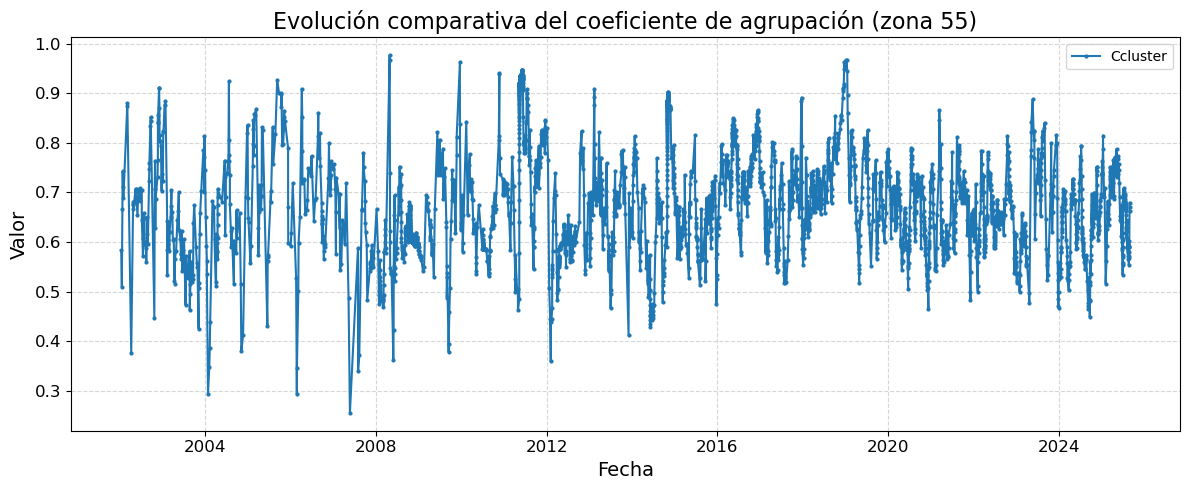

In [55]:
# Comparar evolución del coeficiente de agrupación

filename = f"Evolución comparativa del coeficiente de agrupación (zona {zona})"
output_file=ruta+"/figuras/"+filename


gra.plot_evolucion_multi(
   gdf_2002_24, 
   fecha_col="FechaHora", 
   param_cols=["Ccluster"], 
   output_file=output_file,
   titulo=filename
)

## GUARDA DATAFRAME  

In [56]:
# Guardar

filename = f"Dataframe_caracteristicas_entrada_zona_{zona}.pkl"
output_file=ruta+"/pkl_files/"+filename
   
    
gdf_2002_24.to_pickle(output_file)
print(f"Guardado {filename} con {len(gdf_2002_24)} filas")


Guardado Dataframe_caracteristicas_entrada_zona_55.pkl con 3574 filas
